In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import geopandas as gpd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split

### The IowaHouseElections.csv file is a modified version of the IowaHouse.csv file - I kept only the 2012-2022 election data and created a Total (T) vote count column for each individual election per House district.

In [3]:
# Read in csv file
iowa_senate = pd.read_csv('Files/IowaSenateElections.csv')

In [4]:
iowa_senate.shape

(50, 101)

In [5]:
iowa_senate.head()

,District ID,G22AgD,G22AgR,G22AgO,G22AgT,G22AgrCD,G22AgrCR,G22AgrCO,G22AgrCT,G22TreD,...,G14GovO,G14GovT,G14SenR,G14SenD,G14SenO,G14SenT,G12PreR,G12PreD,G12PreO,G12PreT
0,1,6740,7213,0,13953,5583,8336,0,13919,6503,...,411,15958,8089,7087,898,16074,10396,13708,426,24530
1,2,4334,19724,0,24058,2805,21421,0,24226,4346,...,178,22926,19059,3375,396,22830,24272,6630,238,31140
2,3,6811,14137,0,20948,4000,17104,0,21104,6793,...,398,21866,14589,6315,914,21818,18670,11442,313,30425
3,4,8867,13560,0,22427,5650,16798,0,22448,8913,...,1064,23682,13919,8560,1070,23549,16852,15419,318,32589
4,5,9506,17438,0,26944,6039,21033,0,27072,9634,...,404,26088,15454,9319,1164,25937,19713,15557,323,35593


In [6]:
# Subsetting for total(T) vote count columns
iowa_senate_e = iowa_senate.loc[:, iowa_senate.columns.str.contains('District ID|T$')]

In [7]:
iowa_senate_e.head()

,District ID,G22AgT,G22AgrCT,G22TreT,G22AudT,G22SosT,G22GovT,G22SenT,G20PreT,G20SenT,...,G16PreT,G16SenT,G14AgT,G14AgrCT,G14TreT,G14AudT,G14SosT,G14GovT,G14SenT,G12PreT
0,1,13953,13919,13956,13960,14023,14072,14121,23889,23426,...,23515,23083,15520,15301,15388,15084,15467,15958,16074,24530
1,2,24058,24226,24012,24047,24258,24704,24599,34030,33561,...,32150,31476,22399,22068,22271,21657,21957,22926,22830,31140
2,3,20948,21104,20867,20849,21018,21318,21185,31060,30616,...,30595,29930,21154,21054,20918,20269,20773,21866,21818,30425
3,4,22427,22448,22421,22397,22503,22591,22553,32164,31913,...,31567,31062,23199,22883,22706,22081,22666,23682,23549,32589
4,5,26944,27072,26956,26900,27030,27185,27220,37254,36991,...,35431,35014,25350,25405,24956,24471,24899,26088,25937,35593


In [8]:
# Calculate yearly averages for all elections vote totals
for year in range(12, 23, 2):
    iowa_senate_e['20{}'.format(year)] = iowa_senate_e.loc[:, iowa_senate_e.columns.str.contains('{}'.format(year))].mean(axis=1)

In [9]:
iowa_senate_e.head()

,District ID,G22AgT,G22AgrCT,G22TreT,G22AudT,G22SosT,G22GovT,G22SenT,G20PreT,G20SenT,...,G14SosT,G14GovT,G14SenT,G12PreT,2012,2014,2016,2018,2020,2022
0,1,13953,13919,13956,13960,14023,14072,14121,23889,23426,...,15467,15958,16074,24530,24530.0,15541.714286,23299.0,17913.000000,21433.119048,14000.571429
1,2,24058,24226,24012,24047,24258,24704,24599,34030,33561,...,21957,22926,22830,31140,31140.0,22301.142857,31813.0,24186.833333,29505.329365,24272.000000
2,3,20948,21104,20867,20849,21018,21318,21185,31060,30616,...,20773,21866,21818,30425,30425.0,21121.714286,30262.5,22762.666667,27707.980159,21041.285714
3,4,22427,22448,22421,22397,22503,22591,22553,32164,31913,...,22666,23682,23549,32589,32589.0,22966.571429,31314.5,24569.166667,29252.706349,22477.142857
4,5,26944,27072,26956,26900,27030,27185,27220,37254,36991,...,24899,26088,25937,35593,35593.0,25300.857143,35222.5,27954.333333,33052.615079,27043.857143


In [10]:
# Subsetting for yearly averages columns
iowa_senate_y = iowa_senate_e.drop(iowa_senate_e.columns[1:26], axis=1)

In [11]:
iowa_senate_y.shape

(50, 7)

In [12]:
iowa_senate_y.head()

,District ID,2012,2014,2016,2018,2020,2022
0,1,24530.0,15541.714286,23299.0,17913.000000,21433.119048,14000.571429
1,2,31140.0,22301.142857,31813.0,24186.833333,29505.329365,24272.000000
2,3,30425.0,21121.714286,30262.5,22762.666667,27707.980159,21041.285714
3,4,32589.0,22966.571429,31314.5,24569.166667,29252.706349,22477.142857
4,5,35593.0,25300.857143,35222.5,27954.333333,33052.615079,27043.857143


In [13]:
iowa_senate_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   District ID  50 non-null     int64  
 1   2012         50 non-null     float64
 2   2014         50 non-null     float64
 3   2016         50 non-null     float64
 4   2018         50 non-null     float64
 5   2020         50 non-null     float64
 6   2022         50 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 2.9 KB


In [14]:
# Create features and target variables
features = iowa_senate_y.drop(['District ID','2022'], axis=1)
target = iowa_senate_y['2022']

In [15]:
# Split data into 80% training set and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=1)

### I selected the RandomForestRegressor algorithm for this predictive task due to its strong resistance to overfitting, versatility in handling various regression tasks, and the advantage of not requiring standardization and normalization.

In [16]:
# Instantiate RandomForestRegressor algorithm
rf = RandomForestRegressor(random_state=1)

In [17]:
# Fit model to training set
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [18]:
# R2 socre using the testing set
rf.score(X_test, y_test)

0.87350088150316

In [19]:
# Root Mean Square Error (RMSE) model score
y_pred = rf.predict(X_test)
mse(y_test, y_pred, squared=False)

1008.6807381289866

In [20]:
iowa_senate_y.head()

,District ID,2012,2014,2016,2018,2020,2022
0,1,24530.0,15541.714286,23299.0,17913.000000,21433.119048,14000.571429
1,2,31140.0,22301.142857,31813.0,24186.833333,29505.329365,24272.000000
2,3,30425.0,21121.714286,30262.5,22762.666667,27707.980159,21041.285714
3,4,32589.0,22966.571429,31314.5,24569.166667,29252.706349,22477.142857
4,5,35593.0,25300.857143,35222.5,27954.333333,33052.615079,27043.857143


In [21]:
# Create function to predict total vote per senate district
def array_pred(year):
    array = np.array(iowa_senate_y.drop(['District ID', year], axis=1).iloc[:,:])
    array_year = rf.predict(array)
    return array_year

In [22]:
# Average out vote totals per senate district by dropping each year and predicting for 2024
array_avg_24 = (array_pred('2012')+array_pred('2014')+array_pred('2016')+array_pred('2018')+array_pred('2020')\
                +array_pred('2022'))/6

In [23]:
# Create new 2024 column with the averaged out prediction
iowa_senate_y['2024'] = array_avg_24

In [24]:
iowa_senate_y.head()

,District ID,2012,2014,2016,2018,2020,2022,2024
0,1,24530.0,15541.714286,23299.0,17913.000000,21433.119048,14000.571429,15796.484286
1,2,31140.0,22301.142857,31813.0,24186.833333,29505.329365,24272.000000,24409.557857
2,3,30425.0,21121.714286,30262.5,22762.666667,27707.980159,21041.285714,23685.258095
3,4,32589.0,22966.571429,31314.5,24569.166667,29252.706349,22477.142857,24298.494762
4,5,35593.0,25300.857143,35222.5,27954.333333,33052.615079,27043.857143,26573.045476


In [25]:
# Run new model to evaluate model performance using newly added predicted 2024 data
features = iowa_senate_y.drop(['District ID', '2024'], axis=1)
target = iowa_senate_y['2024']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=1)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9025356855281008

In [26]:
# Average out vote totals per senate district by dropping each year and predicting for 2026
array_avg_26 = (array_pred('2012')+array_pred('2014')+array_pred('2016')+array_pred('2018')+array_pred('2020')\
                +array_pred('2022')+array_pred('2024'))/7

In [27]:
# Create new 2026 column with the averaged out prediction
iowa_senate_y['2026'] = array_avg_26

In [28]:
iowa_senate_y.head()

,District ID,2012,2014,2016,2018,2020,2022,2024,2026
0,1,24530.0,15541.714286,23299.0,17913.000000,21433.119048,14000.571429,15796.484286,18041.927659
1,2,31140.0,22301.142857,31813.0,24186.833333,29505.329365,24272.000000,24409.557857,23396.657186
2,3,30425.0,21121.714286,30262.5,22762.666667,27707.980159,21041.285714,23685.258095,22985.011846
3,4,32589.0,22966.571429,31314.5,24569.166667,29252.706349,22477.142857,24298.494762,23268.131630
4,5,35593.0,25300.857143,35222.5,27954.333333,33052.615079,27043.857143,26573.045476,26296.812706


In [29]:
# Run new model to evaluate model performance using newly added predicted2026 data
features = iowa_senate_y.drop(['District ID', '2026'], axis=1)
target = iowa_senate_y['2026']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=1)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9873566428998561

In [30]:
# Average out vote totals per senate district by dropping each year and predicting for 2028
array_avg_28 = (array_pred('2012')+array_pred('2014')+array_pred('2016')+array_pred('2018')+array_pred('2020')\
                +array_pred('2022')+array_pred('2024')+array_pred('2026'))/8

In [31]:
# Create new 2028 column with the averaged out prediction
iowa_senate_y['2028'] = array_avg_28

In [32]:
iowa_senate_y.head()

,District ID,2012,2014,2016,2018,2020,2022,2024,2026,2028
0,1,24530.0,15541.714286,23299.0,17913.000000,21433.119048,14000.571429,15796.484286,18041.927659,19150.909743
1,2,31140.0,22301.142857,31813.0,24186.833333,29505.329365,24272.000000,24409.557857,23396.657186,23061.816451
2,3,30425.0,21121.714286,30262.5,22762.666667,27707.980159,21041.285714,23685.258095,22985.011846,22740.857457
3,4,32589.0,22966.571429,31314.5,24569.166667,29252.706349,22477.142857,24298.494762,23268.131630,22976.356613
4,5,35593.0,25300.857143,35222.5,27954.333333,33052.615079,27043.857143,26573.045476,26296.812706,25794.173923


In [33]:
# Run new model to evaluate model performance using newly added predicted 2028 data
features = iowa_senate_y.drop(['District ID', '2028'], axis=1)
target = iowa_senate_y['2028']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=1)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.998583899661055

In [34]:
# Average out vote totals per senate district by dropping each year and predicting for 2030
array_avg_30 = (array_pred('2012')+array_pred('2014')+array_pred('2016')+array_pred('2018')+array_pred('2020')\
                +array_pred('2022')+array_pred('2024')+array_pred('2026')+array_pred('2028'))/9

In [35]:
# Create new 2030 column with the averaged out prediction
iowa_senate_y['2030'] = array_avg_30

In [36]:
iowa_senate_y.head()

,District ID,2012,2014,2016,2018,2020,2022,2024,2026,2028,2030
0,1,24530.0,15541.714286,23299.0,17913.000000,21433.119048,14000.571429,15796.484286,18041.927659,19150.909743,19704.064554
1,2,31140.0,22301.142857,31813.0,24186.833333,29505.329365,24272.000000,24409.557857,23396.657186,23061.816451,22832.816395
2,3,30425.0,21121.714286,30262.5,22762.666667,27707.980159,21041.285714,23685.258095,22985.011846,22740.857457,22588.828391
3,4,32589.0,22966.571429,31314.5,24569.166667,29252.706349,22477.142857,24298.494762,23268.131630,22976.356613,22764.998241
4,5,35593.0,25300.857143,35222.5,27954.333333,33052.615079,27043.857143,26573.045476,26296.812706,25794.173923,25598.356316


In [37]:
# Run new model to evaluate model performance using newly added predicted 2030 data
features = iowa_senate_y.drop(['District ID', '2030'], axis=1)
target = iowa_senate_y['2030']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=1)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9976212353307894

In [38]:
# Read in democratic vote totals through 2030 csv file
iowa_uh_dem = pd.read_csv('Files/iowa_uh_dem.csv')
iowa_uh_dem.head()

,District ID,2012,2014,2016,2018,2020,2022,2024,2026,2028,2030
0,1,13708.0,6931.714286,9536.0,9967.166667,10479.980159,6118.142857,6432.035476,6539.415388,6543.217271,6548.761588
1,2,6630.0,3245.000000,4441.0,6000.666667,5460.611111,3701.428571,5279.724286,6005.204998,6294.263969,6429.779679
2,3,11442.0,6332.428571,7253.0,9051.166667,8722.932540,5582.571429,6780.061667,6538.189424,6520.389892,6529.501747
3,4,15419.0,9412.571429,9140.5,11481.666667,11112.456349,7330.000000,7592.820238,7196.589869,7033.187673,6966.408443
4,5,15557.0,9393.857143,9674.0,12073.333333,11864.198413,8081.857143,8185.600238,7638.117541,7404.063202,7239.078741


In [39]:
iowa_uh_dem['2024'].sum() / iowa_senate_y['2024'].sum()

0.42800945797684714

In [40]:
# Merging vote totals and democratic vote totals datasets
iowa_t_d = iowa_senate_y.merge(iowa_uh_dem, on='District ID', suffixes=('_t', '_d'))

In [41]:
iowa_t_d.head()

,District ID,2012_t,2014_t,2016_t,2018_t,2020_t,2022_t,2024_t,2026_t,2028_t,...,2012_d,2014_d,2016_d,2018_d,2020_d,2022_d,2024_d,2026_d,2028_d,2030_d
0,1,24530.0,15541.714286,23299.0,17913.000000,21433.119048,14000.571429,15796.484286,18041.927659,19150.909743,...,13708.0,6931.714286,9536.0,9967.166667,10479.980159,6118.142857,6432.035476,6539.415388,6543.217271,6548.761588
1,2,31140.0,22301.142857,31813.0,24186.833333,29505.329365,24272.000000,24409.557857,23396.657186,23061.816451,...,6630.0,3245.000000,4441.0,6000.666667,5460.611111,3701.428571,5279.724286,6005.204998,6294.263969,6429.779679
2,3,30425.0,21121.714286,30262.5,22762.666667,27707.980159,21041.285714,23685.258095,22985.011846,22740.857457,...,11442.0,6332.428571,7253.0,9051.166667,8722.932540,5582.571429,6780.061667,6538.189424,6520.389892,6529.501747
3,4,32589.0,22966.571429,31314.5,24569.166667,29252.706349,22477.142857,24298.494762,23268.131630,22976.356613,...,15419.0,9412.571429,9140.5,11481.666667,11112.456349,7330.000000,7592.820238,7196.589869,7033.187673,6966.408443
4,5,35593.0,25300.857143,35222.5,27954.333333,33052.615079,27043.857143,26573.045476,26296.812706,25794.173923,...,15557.0,9393.857143,9674.0,12073.333333,11864.198413,8081.857143,8185.600238,7638.117541,7404.063202,7239.078741


In [42]:
# Subsetting to District ID and 2030 columns
iowa_d_30 = iowa_t_d[['District ID', '2030_t', '2030_d']]
iowa_d_30.head()

,District ID,2030_t,2030_d
0,1,19704.064554,6548.761588
1,2,22832.816395,6429.779679
2,3,22588.828391,6529.501747
3,4,22764.998241,6966.408443
4,5,25598.356316,7239.078741


In [43]:
iowa_d_30.shape

(50, 3)

In [44]:
# Calculate democratic vote share percentage of total
iowa_d_30['Perct_d'] = (iowa_d_30['2030_d'] / iowa_d_30['2030_t']) * 100

In [45]:
iowa_d_30.head()

,District ID,2030_t,2030_d,Perct_d
0,1,19704.064554,6548.761588,33.235587
1,2,22832.816395,6429.779679,28.160257
2,3,22588.828391,6529.501747,28.905889
3,4,22764.998241,6966.408443,30.601401
4,5,25598.356316,7239.078741,28.279467


In [46]:
iowa_d_30['Perct_d'].max()

70.3595451557387

In [47]:
# Read in 2030 population prediction csv file
ia_pop_2030_uh = pd.read_csv('Files/ia_pop_2030_uh.csv')

In [48]:
ia_pop_2030_uh.head()

,District ID,pop_pred_2030
0,1,65665.274533
1,2,66755.037055
2,3,63008.709124
3,4,61279.371175
4,5,62214.014674


In [49]:
# Merge 2030 population data to 2030 election data
ia_d_pop_2030 = iowa_d_30.merge(ia_pop_2030_uh, on='District ID')

In [50]:
ia_d_pop_2030.head()

,District ID,2030_t,2030_d,Perct_d,pop_pred_2030
0,1,19704.064554,6548.761588,33.235587,65665.274533
1,2,22832.816395,6429.779679,28.160257,66755.037055
2,3,22588.828391,6529.501747,28.905889,63008.709124
3,4,22764.998241,6966.408443,30.601401,61279.371175
4,5,25598.356316,7239.078741,28.279467,62214.014674


In [51]:
ia_d_pop_2030.shape

(50, 5)

In [52]:
# Read in Iowa census shapefile for upper house districts
ia_map = gpd.read_file('https://www2.census.gov/geo/tiger/GENZ2023/shp/cb_2023_19_sldu_500k.zip')

In [53]:
ia_map.head()

,STATEFP,SLDUST,GEOIDFQ,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,LSY,ALAND,AWATER,geometry
0,19,042,610U800US19042,19042,42,State Senate District 42,IA,Iowa,LU,2022,3099619669,20949440,"MULTIPOLYGON (((-91.73057 41.99160, -91.72702 ..."
1,19,033,610U800US19033,19033,33,State Senate District 33,IA,Iowa,LU,2022,4066835225,45115771,"POLYGON ((-91.36588 41.94741, -91.36558 41.976..."
2,19,039,610U800US19039,19039,39,State Senate District 39,IA,Iowa,LU,2022,151253617,1823803,"POLYGON ((-91.77169 41.95686, -91.75508 41.956..."
3,19,046,610U800US19046,19046,46,State Senate District 46,IA,Iowa,LU,2022,4183749838,23560976,"POLYGON ((-92.29995 41.69510, -92.29980 41.695..."
4,19,050,610U800US19050,19050,50,State Senate District 50,IA,Iowa,LU,2022,1628697243,64254024,"POLYGON ((-91.71879 40.81354, -91.68010 40.813..."


In [54]:
ia_map.shape

(50, 13)

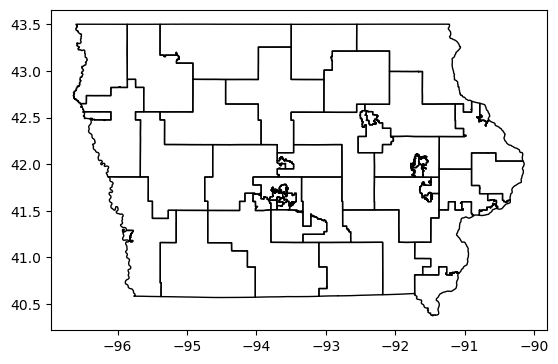

In [55]:
ia_map.plot(facecolor='none', edgecolor='black');

In [56]:
# Rename NAME column to District ID to be able to easily merge datasets
ia_map = ia_map.rename(columns={'NAME': 'District ID'})
ia_map['District ID'] = ia_map['District ID'].astype(int)

In [57]:
ia_map.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   STATEFP      50 non-null     object  
 1   SLDUST       50 non-null     object  
 2   GEOIDFQ      50 non-null     object  
 3   GEOID        50 non-null     object  
 4   District ID  50 non-null     int64   
 5   NAMELSAD     50 non-null     object  
 6   STUSPS       50 non-null     object  
 7   STATE_NAME   50 non-null     object  
 8   LSAD         50 non-null     object  
 9   LSY          50 non-null     object  
 10  ALAND        50 non-null     int64   
 11  AWATER       50 non-null     int64   
 12  geometry     50 non-null     geometry
dtypes: geometry(1), int64(3), object(9)
memory usage: 5.2+ KB


In [58]:
# Merge census data with population and election data
ia_geocoded_2030_uh = ia_d_pop_2030.merge(ia_map, on='District ID')

In [59]:
ia_geocoded_2030_uh.head()

,District ID,2030_t,2030_d,Perct_d,pop_pred_2030,STATEFP,SLDUST,GEOIDFQ,GEOID,NAMELSAD,STUSPS,STATE_NAME,LSAD,LSY,ALAND,AWATER,geometry
0,1,19704.064554,6548.761588,33.235587,65665.274533,19,001,610U800US19001,19001,State Senate District 1,IA,Iowa,LU,2022,287009612,1853231,"POLYGON ((-96.49878 42.56104, -96.46085 42.561..."
1,2,22832.816395,6429.779679,28.160257,66755.037055,19,002,610U800US19002,19002,State Senate District 2,IA,Iowa,LU,2022,4577717842,3632141,"POLYGON ((-96.63836 42.73550, -96.63797 42.736..."
2,3,22588.828391,6529.501747,28.905889,63008.709124,19,003,610U800US19003,19003,State Senate District 3,IA,Iowa,LU,2022,5781717602,20441063,"POLYGON ((-95.86227 43.21486, -95.86191 43.257..."
3,4,22764.998241,6966.408443,30.601401,61279.371175,19,004,610U800US19004,19004,State Senate District 4,IA,Iowa,LU,2022,6313907891,25379185,"POLYGON ((-95.38801 42.56174, -95.35306 42.561..."
4,5,25598.356316,7239.078741,28.279467,62214.014674,19,005,610U800US19005,19005,State Senate District 5,IA,Iowa,LU,2022,7558491543,109308552,"POLYGON ((-95.38818 43.24129, -95.38808 43.241..."


In [60]:
ia_geocoded_2030_uh.shape

(50, 17)

In [61]:
ia_geocoded_2030_uh.columns

Index(['District ID', '2030_t', '2030_d', 'Perct_d', 'pop_pred_2030',
       'STATEFP', 'SLDUST', 'GEOIDFQ', 'GEOID', 'NAMELSAD', 'STUSPS',
       'STATE_NAME', 'LSAD', 'LSY', 'ALAND', 'AWATER', 'geometry'],
      dtype='object')

In [62]:
# Subsetting data frame to only include district name, 2030 population and election results, and district geometry to map
ia_geocoded_2030_uh = ia_geocoded_2030_uh[['District ID', '2030_t', '2030_d', 'Perct_d', 'pop_pred_2030', 'geometry']]

In [63]:
ia_geocoded_2030_uh.head()

,District ID,2030_t,2030_d,Perct_d,pop_pred_2030,geometry
0,1,19704.064554,6548.761588,33.235587,65665.274533,"POLYGON ((-96.49878 42.56104, -96.46085 42.561..."
1,2,22832.816395,6429.779679,28.160257,66755.037055,"POLYGON ((-96.63836 42.73550, -96.63797 42.736..."
2,3,22588.828391,6529.501747,28.905889,63008.709124,"POLYGON ((-95.86227 43.21486, -95.86191 43.257..."
3,4,22764.998241,6966.408443,30.601401,61279.371175,"POLYGON ((-95.38801 42.56174, -95.35306 42.561..."
4,5,25598.356316,7239.078741,28.279467,62214.014674,"POLYGON ((-95.38818 43.24129, -95.38808 43.241..."


In [64]:
ia_geocoded_2030_uh.shape

(50, 6)

In [65]:
## Save to csv file to be able to import in to Tableau
# ia_geocoded_2030_uh.to_csv('ia_geocoded_2030_uh.csv', index=False)